# MACHINE LEARNING WITH LINEAR REGRESSION ALGORITHM

* **Author:** Cheisa Billy Putra Antoni
* **Date:** 31 Jan 2026
* **Type:** Supervised Learning
* **Goals:** House Prices Prediction Model

## SETUP & CONFIGURATION

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Style and Display

In [2]:
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('tab10')

## DATA DESCRIPTION

### Load Dataset

In [3]:
df = pd.read_csv('real_estate.csv', sep = ',')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Data Structure

In [4]:
df.shape

(414, 8)

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## EXPLORATORY DATA ANALYSIS

### Data Quality

In [6]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
    
    print()

No int64
1 414

X1 transaction date float64
2012.667 2013.583

X2 house age float64
0.0 43.8

X3 distance to the nearest MRT station float64
23.38284 6488.021

X4 number of convenience stores int64
0 10

X5 latitude float64
24.93207 25.01459

X6 longitude float64
121.47353 121.56627

Y house price of unit area float64
7.6 117.5



### Drop the Unused Column

In [7]:
df = df.drop(columns = ['No', 'X1 transaction date'])

### Rename the Column

In [8]:
df = df.rename(columns = {'X2 house age': 'Age',
                          'X3 distance to the nearest MRT station': 'Station',
                          'X4 number of convenience stores': 'Stores',
                          'X5 latitude': 'Latitude',
                          'X6 longitude': 'Longitude',
                          'Y house price of unit area': 'Price'})

### Missing Values

In [9]:
df.isna().sum()

Age          0
Station      0
Stores       0
Latitude     0
Longitude    0
Price        0
dtype: int64

### Duplicates Values

In [10]:
df.duplicated().sum()

np.int64(0)

### Descriptive Statistics

In [24]:
print(df.describe().to_string())

              Age      Station      Stores    Latitude   Longitude       Price
count  414.000000   414.000000  414.000000  414.000000  414.000000  414.000000
mean    17.712560  1083.885689    4.094203   24.969030  121.533361   37.980193
std     11.392485  1262.109595    2.945562    0.012410    0.015347   13.606488
min      0.000000    23.382840    0.000000   24.932070  121.473530    7.600000
25%      9.025000   289.324800    1.000000   24.963000  121.528085   27.700000
50%     16.100000   492.231300    4.000000   24.971100  121.538630   38.450000
75%     28.150000  1454.279000    6.000000   24.977455  121.543305   46.600000
max     43.800000  6488.021000   10.000000   25.014590  121.566270  117.500000


### Outliers

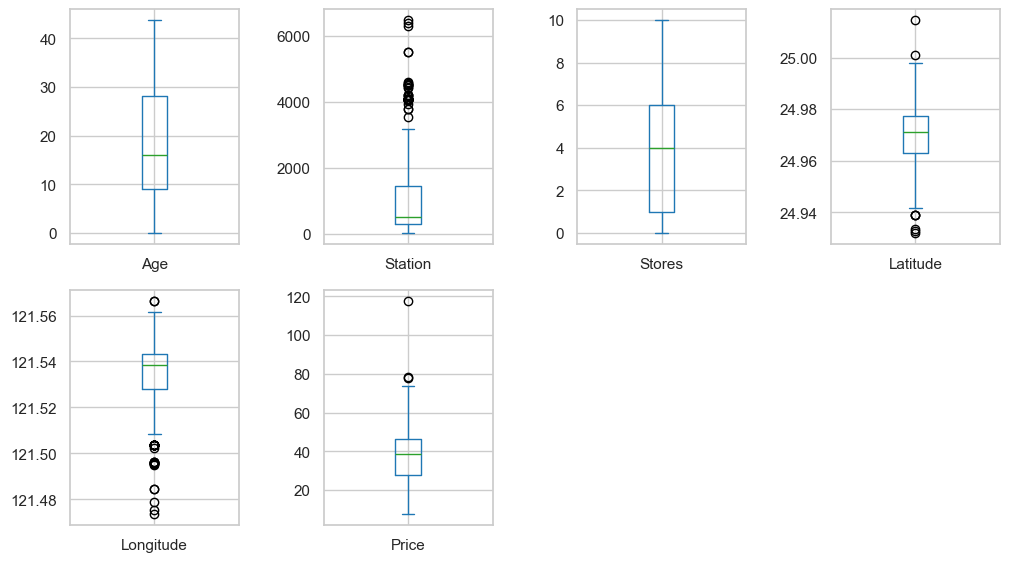

In [12]:
df.plot(subplots = True, kind = 'box', layout = (4, 4), figsize = (12, 14))
plt.subplots_adjust(wspace = 0.5)

### Visualization of Distributions

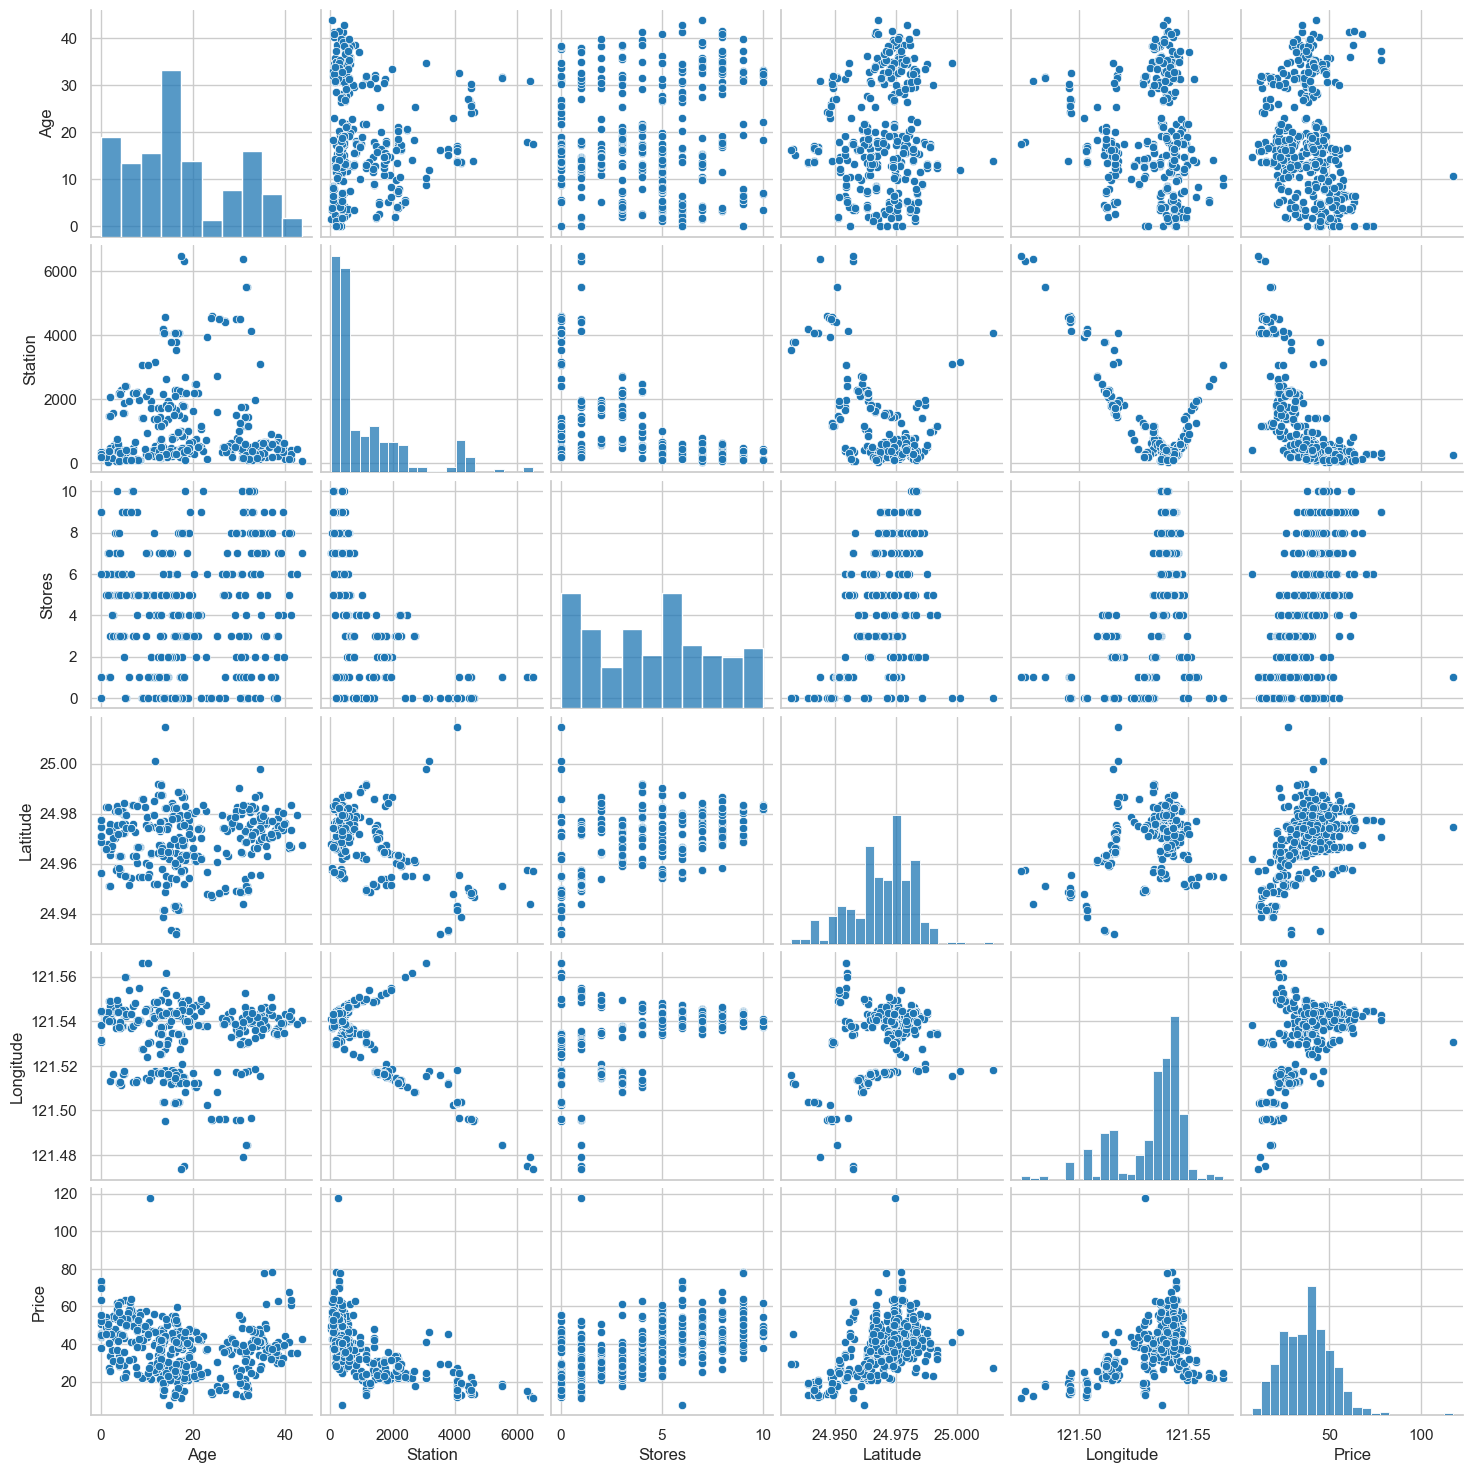

In [13]:
sns.pairplot(df)

### Pearson Correlations

In [28]:
corr = df.corr(method = 'pearson')
corr.style.background_gradient(cmap = 'coolwarm')

,Age,Station,Stores,Latitude,Longitude,Price
Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


## DATA PREPROCESSING

### Data Spiltting

In [15]:
X = df[['Age', 'Station', 'Stores', 'Latitude', 'Longitude']]
Y = df['Price']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Data Scaling

In [16]:
scaler = StandardScaler()
X_Train_Scaled = scaler.fit_transform(X_Train)
X_Test_Scaled  = scaler.transform(X_Test)

## MODELLING

#### Data Training

In [17]:
model = LinearRegression()
model.fit(X_Train_Scaled, Y_Train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Intercept

In [18]:
model.intercept_

np.float64(38.39154078549814)

### Coefficients

In [19]:
model.coef_

array([-3.06045213, -5.53623761,  3.25926406,  2.94298597, -0.35743672])

### Predict the Data Testing

In [20]:
Y_Test_Predict  = model.predict(X_Test_Scaled)
Y_Test_Predict

array([47.74180481, 41.95484652, 44.5399885 , 41.33697932, 30.28548   ,
       42.84474934, 45.98717123, 45.90599326, 24.78369465, 52.02068924,
       32.23880597, 34.77542016, 39.51392044, 24.90203898, 35.73984968,
       32.99552705, 41.96863217, 46.98662328, 31.50100311, 44.49258341,
        2.21362693, 33.64381059, 47.764103  , 43.56374399, 14.07301949,
       41.29883092, 14.73315281, 44.5399885 , 36.13972668, 37.76019401,
       11.66211419, 39.22848089, 37.83881729, 28.61334713, 45.93500741,
       31.52925298, 52.2101045 , 15.18188713, 46.84531477, 40.47464938,
       36.01694465, 40.58052131, 48.38869976, 39.8943259 , 42.00896517,
       48.22742934, 45.07252677, 23.5290158 , 49.9849698 , 48.13933326,
       47.74180481, 48.54209921, 40.94754085, 42.54642454, 36.38766353,
       15.15482781, 35.13348041, 36.39866246, 30.20430203, 45.90599326,
       33.69672647, 32.65567761, 15.15482781, 11.8739673 ,  8.74877596,
       33.67086991, 29.81801432, 45.24751413, 34.2425491 , 30.54

## MODEL EVALUATION

#### Evaluation Metrics

In [29]:
mse = mean_squared_error(Y_Test, Y_Test_Predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_Test, Y_Test_Predict)
r2 = r2_score(Y_Test, Y_Test_Predict)
print(f'MSE\t\t: {mse}\nRMSE\t\t: {rmse}\nMAE\t\t: {mae}\nR Square\t: {r2}')

MSE		: 54.58094520086212
RMSE		: 7.387891796775459
MAE		: 5.350138374356212
R Square	: 0.6746481382828176


#### Visualization of Model Evaluation

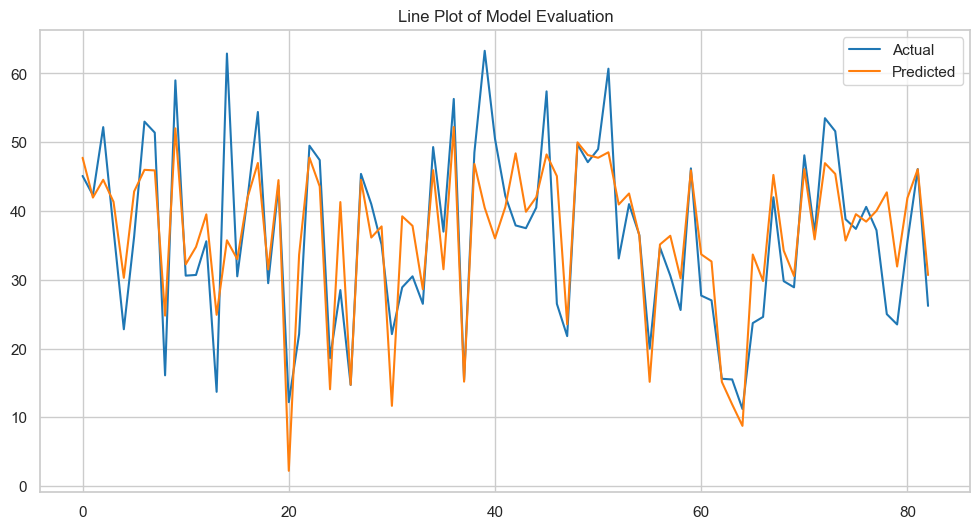

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(Y_Test.values, label = 'Actual')
plt.plot(Y_Test_Predict, label = 'Predicted')
plt.title("Line Plot of Model Evaluation")
plt.legend()
plt.show()

## EXPORTING

### Save Model

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X_Train, Y_Train)
joblib.dump(pipeline, 'house_price_prediction_model.pkl')

"\npipeline = Pipeline([\n    ('scaler', StandardScaler()),\n    ('model', LinearRegression())\n])\npipeline.fit(X_Train, Y_Train)\njoblib.dump(pipeline, 'house_price_prediction_model.pkl')\n"